In [1]:
import sys
import csv
import json
import requests
import requests_cache
import numpy as np
import pandas as pd
from yahoo_finance import Share
from pprint import pprint 
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web

import matplotlib as mpl
%matplotlib inline

import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

import missingno as msno

In [2]:
# WEI -- look at Audrey's myget()

# this is a function to get the most recent n days recorded from a given company code
def myget(length, code):
    comp = Share(code)
    try:
        c = comp.get_historical('2000-11-03', '2001-01-28')
        report = []
        for i in range(0,length):
            dat = {'Symbol':c[i]['Symbol'],c[i]['Date']:float(c[i]['High'])} 
            report.append(dat)
        df = pd.DataFrame(report)
        df = df.replace(np.nan, 0).groupby('Symbol').sum()
    except YQLResponseMalformedError():
        df = None
    return df

In [3]:
# JEREMY -- look at Audrey's myget()

# this is a function to get the most recent n days recorded from a given company code
def myget(length, code):
    comp = Share(code)
    c = comp.get_historical('2014-11-03', '2015-01-28')
    report = []
    for i in range(0,length):
        dat = {'Symbol':c[i]['Symbol'],c[i]['Date']:float(c[i]['High'])} 
        report.append(dat)
        df = pd.DataFrame(report)
        df = df.replace(np.nan, 0).groupby('Symbol').sum()
    return df

In [42]:
comp = Share('AAPL')
c = comp.get_historical('2000-11-03', '2001-01-28')
c[1]["Date"]

'2001-01-25'

In [52]:

report = []
date=[]
price=[]
for i in range(0,40):
    date.append(pd.to_datetime(c[i]["Date"]))
    price.append(float(c[i]["High"]))


datef = pd.DataFrame(date)
pricef = pd.DataFrame(price)

#        df = pd.DataFrame(report)
#        df = df.replace(np.nan, 0).groupby('Symbol').sum().reset_index()
#df

In [69]:
table1 = pd.concat([datef,pricef],axis = 1)
table1.columns = ['Date', 'Price']
table1

,Date,Price
0,2001-01-26,19.812500
1,2001-01-25,20.562500
2,2001-01-24,20.687500
3,2001-01-23,20.937500
4,2001-01-22,19.625000
5,2001-01-19,19.562500
6,2001-01-18,18.750000
7,2001-01-17,17.562500
8,2001-01-16,18.250000
9,2001-01-12,18.000000


In [4]:
# AUDREY

def myget(length, ticker):
    
    """
    Input: Amount of days of historical data, Ticker symbol for company
    Output: Df of high prices with respective dates as column value    
    """    
    
    report = []
    
    comp = Share(ticker)
    
    # Request historical dates, create df using dictionary keys
    try:
        c = comp.get_historical('2000-11-03', '2001-01-28')
        
        for i in range(0,length):
            dat = {'Symbol':c[i]['Symbol'],c[i]['Date']:float(c[i]['High'])} 
            report.append(dat)
            df = pd.DataFrame(report)
            df = df.replace(np.nan, 0).groupby('Symbol').sum().reset_index()
    
    # Return nothing for companies that are not IPO in given date range
    except Exception:
        df = None
        
    return df

In [5]:
csv = pd.read_csv('./companylist.csv')
# We want to keep "Finance, Health Care, Technology, Energy"
newcsv = csv[csv["Sector"].isin(["Finance", "Energy","Health Care","Technology"])]

In [6]:
final = newcsv.reset_index()
del final["index"]

In [7]:
sector = final[['Symbol','Sector']]

In [8]:
mylist = [final.loc[i,'Symbol'] for i in range(len(final))]

In [9]:
# Test with first 40 for time reasons (let's figure out a way to run this more quickly)
audrey_list = mylist[0:39]

In [10]:
df=[]
del df 
for l in audrey_list:
    get = myget(10,l)
    try:
        df = df.append(get)
    except NameError:
        df = pd.DataFrame(get)
# df

In [11]:
# Add in Sector (to later take avrg of)
# Of tested 40, we get 14 back.
#
# Will this be a issue? Of our 1774.. how many actually satisfy our time desired time range?
#
data2 = df.reset_index()
final = pd.merge(data2, sector, on = 'Symbol')
final = final.drop('index', 1)
final

,Symbol,2001-01-12,2001-01-16,2001-01-17,2001-01-18,2001-01-19,2001-01-22,2001-01-23,2001-01-24,2001-01-25,2001-01-26,Sector
0,FCCY,11.499999,10.500001,11.249990,12.374993,13.249987,14.000014,13.750005,14.000014,13.625000,13.750005,Finance
1,SRCE,20.437506,20.500003,20.874995,20.781245,20.531245,20.000002,20.124997,20.374996,20.374996,20.000002,Finance
2,ABEO,5.125000,5.500000,5.312500,5.125000,5.125000,5.187500,5.125000,5.937500,6.500000,6.375000,Health Care
3,ABMD,20.312500,23.375000,23.000000,23.000000,22.437500,21.250000,20.375000,20.375000,19.328119,19.375000,Health Care
4,AXAS,3.750000,3.875000,4.375000,4.000000,4.125000,5.000000,4.687500,4.875000,5.000000,5.062500,Energy
5,ACHC,0.250000,0.265625,0.296875,0.296875,0.296875,0.296875,0.296875,0.375000,0.390625,0.609375,Health Care
6,ACET,8.968758,9.000012,9.000012,9.000012,8.937506,9.000012,9.000012,8.812496,8.812496,8.812496,Health Care
7,ACIW,13.562500,13.625000,13.812500,14.062500,13.984300,12.000000,11.875000,11.937500,11.625000,11.562500,Technology
8,ACNB,16.500003,16.250001,16.749996,16.625004,16.500003,16.625004,16.500003,16.625004,16.500003,16.625004,Finance
9,ATVI,18.187500,18.500000,18.562500,18.437500,18.500000,18.500000,18.875000,18.687500,18.500000,18.625000,Technology


In [16]:
# Playing around with sample subset data to see how plotting will work.
# Will need to convert column headers to datetime to implement timeseries plot 
# Bc not sure if standard line plot will work if we want to use ARMA models
# or forecasting later on.
#
# Let's try this?
# http://www.blackarbs.com/blog/advanced-time-series-plots-in-python/1/6/2017


avg_sector = final.groupby('Sector').mean().reset_index()

eng = avg_sector[avg_sector['Sector'] == 'Energy']
fin = avg_sector[avg_sector['Sector'] == 'Finance']
health = avg_sector[avg_sector['Sector'] == 'Health Care']
tech = avg_sector[avg_sector['Sector'] == 'Technology']

avg_sector

,Sector,2001-01-12,2001-01-16,2001-01-17,2001-01-18,2001-01-19,2001-01-22,2001-01-23,2001-01-24,2001-01-25,2001-01-26
0,Energy,3.750000,3.875000,4.375000,4.000000,4.125000,5.000000,4.687500,4.875000,5.000000,5.062500
1,Finance,16.145836,15.750002,16.291660,16.593747,16.760412,16.875007,16.791668,17.000005,16.833333,16.791670
2,Health Care,8.156178,8.828055,8.721805,8.634308,8.459310,8.246811,8.209302,8.487416,8.387415,8.509286
3,Technology,24.518750,24.212500,25.075000,25.725000,25.909360,26.362500,26.343750,26.343750,25.925000,25.587500


In [13]:
prices = avg_sector.iloc[:,1:11]

In [14]:
date = list(prices.columns.values)

In [15]:
dates = [pd.to_datetime(date[x]) for x in range(0,len(date))]
dates

[Timestamp('2001-01-12 00:00:00'),
 Timestamp('2001-01-16 00:00:00'),
 Timestamp('2001-01-17 00:00:00'),
 Timestamp('2001-01-18 00:00:00'),
 Timestamp('2001-01-19 00:00:00'),
 Timestamp('2001-01-22 00:00:00'),
 Timestamp('2001-01-23 00:00:00'),
 Timestamp('2001-01-24 00:00:00'),
 Timestamp('2001-01-25 00:00:00'),
 Timestamp('2001-01-26 00:00:00')]

In [28]:
# data[plot_cols].plot(subplots=True, ax=axes)


datetime.datetime(2005, 6, 1, 13, 33)

In [ ]:
# yhoo= myget(10, 'TWOU')
# yhoo
# tr = Share('VNET')
# try:
#    tr.get_historical('2000-11-03', '2001-01-28')
# except Exception:
#    pass

In [98]:
csv = pd.read_csv('./companylist.csv')

In [ ]:
sym = csv 

In [6]:
def lookup(jurisdiction, number):
    url = 'http://api.opencorporates.com/companies/' + jurisdiction + '/' + number
    response = requests.get(url)
    if response.status_code == 200:
        data = json.loads(response.text)
        company = data['results']['company']
        return {
            'name': company['name'],
            'type': company['company_type'],
            'incorporated': company['incorporation_date'],
            'address': company['registered_address_in_full']
        }
    else:
        print('Error: ' + str(response.status_code))

In [7]:
print(lookup(sys.argv[1], sys.argv[2]))


Error: 404
None


In [9]:
sys.argv

['/Users/audreychu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py',
 '-f',
 '/Users/audreychu/Library/Jupyter/runtime/kernel-2a43a2c9-8519-458f-990a-ad9d9651c8a6.json']

In [14]:
# get index and fed data

f1 = 'USREC' # recession data from FRED

start = pd.to_datetime('1999-01-01')
end = pd.datetime.today()

mkt = '^GSPC'
MKT = (web.DataReader([mkt,'^VIX'], 'yahoo', start, end)['Adj Close']
      .resample('MS') # month start b/c FED data is month start
       .mean()
       .rename(columns={mkt:'SPX','^VIX':'VIX'})
       .assign(SPX_returns=lambda x: np.log(x['SPX']/x['SPX'].shift(1)))
       .assign(VIX_returns=lambda x: np.log(x['VIX']/x['VIX'].shift(1)))
       )
MKT

# data = (web.DataReader([f1], 'fred', start, end)
#        .join(MKT, how='outer')
#        .dropna())

# print(data.head())
# print(data.info())
# msno.matrix(data)

,SPX,VIX,SPX_returns,VIX_returns
Date,,,,
1999-01-01,1248.774735,28.035263,NaN,NaN
1999-02-01,1246.582115,28.822632,-0.001757,0.027698
1999-03-01,1281.663914,25.309565,0.027754,-0.129978
1999-04-01,1334.756662,23.478571,0.040590,-0.075094
1999-05-01,1332.074011,26.204500,-0.002012,0.109843
1999-06-01,1322.552734,23.626364,-0.007173,-0.103568
1999-07-01,1380.990002,21.049048,0.043237,-0.115508
1999-08-01,1327.488653,24.323636,-0.039512,0.144593
1999-09-01,1318.171904,24.541429,-0.007043,0.008914


In [9]:
# recessions are marked as 1 in the data
recs = data.query('USREC==1')

# Select the two recessions over the time period
recs_2k = recs.ix['2001']
recs_2k8 = recs.ix['2008':]

# now we can grab the indices for the start
# and end of each recession
recs2k_bgn = recs_2k.index[0]
recs2k_end = recs_2k.index[-1]

recs2k8_bgn = recs_2k8.index[0]
recs2k8_end = recs_2k8.index[-1]

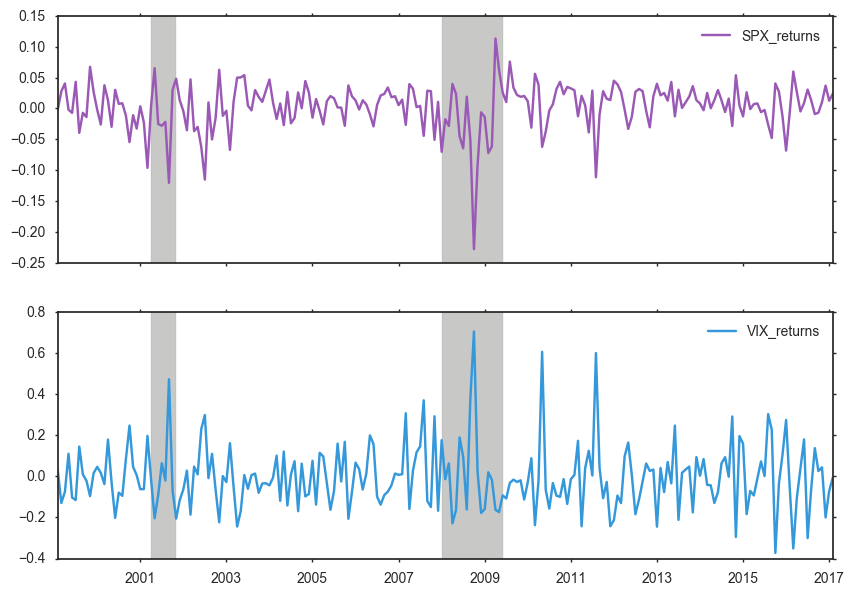

In [10]:
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['SPX_returns', 'VIX_returns']

# 2 axes for 2 subplots

fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes)
for ax in axes:
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)

In [91]:
comp = Share('YHOO')

In [93]:
report = []

c = comp.get_historical('2000-11-03', '2001-01-28')
        
for i in range(0,10):
    dat = {'Symbol':c[i]['Symbol'],c[i]['Date']:float(c[i]['High']),'Sector':c[i]['Sector']} 
    report.append(dat)
    df = pd.DataFrame(report)
    df = df.replace(np.nan, 0).groupby('Symbol').sum()

KeyError: 'Sector'

In [94]:
comp.get_historical('2000-11-03', '2001-01-28')

[{'Adj_Close': '18.84375',
  'Close': '37.6875',
  'Date': '2001-01-26',
  'High': '38.625',
  'Low': '36.125',
  'Open': '37.625',
  'Symbol': 'YHOO',
  'Volume': '24462600'},
 {'Adj_Close': '19.59375',
  'Close': '39.1875',
  'Date': '2001-01-25',
  'High': '42.8125',
  'Low': '38.5625',
  'Open': '41.875',
  'Symbol': 'YHOO',
  'Volume': '44249200'},
 {'Adj_Close': '21.4375',
  'Close': '42.875',
  'Date': '2001-01-24',
  'High': '43.375',
  'Low': '38.00',
  'Open': '38.3125',
  'Symbol': 'YHOO',
  'Volume': '57294800'},
 {'Adj_Close': '19.476549',
  'Close': '38.953098',
  'Date': '2001-01-23',
  'High': '39.00',
  'Low': '34.1875',
  'Open': '34.4375',
  'Symbol': 'YHOO',
  'Volume': '34783200'},
 {'Adj_Close': '17.34375',
  'Close': '34.6875',
  'Date': '2001-01-22',
  'High': '35.75',
  'Low': '32.5625',
  'Open': '33.3125',
  'Symbol': 'YHOO',
  'Volume': '25512600'},
 {'Adj_Close': '16.90625',
  'Close': '33.8125',
  'Date': '2001-01-19',
  'High': '36.0625',
  'Low': '32.562